In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from sklearn.preprocessing import StandardScaler

# Resumen
El proyecto explora la calidad del aire en diversas regiones utilizando datos de la API WAQI. Analiza factores como contaminantes clave (PM2.5, PM10, CO, SO2, NO2, O3), identifica tendencias temporales y geográficas, y plantea modelos predictivos para evaluar riesgos a la salud. Los hallazgos ofrecen insights para estrategias de mitigación en áreas afectadas.

# Objetivo
Determinar las regiones con mayor exposición a contaminantes atmosféricos, analizar patrones temporales de la calidad del aire y proporcionar recomendaciones para la toma de decisiones en políticas públicas ambientales.

# Contexto Comercial
Se plantea un escenario ficticio donde una organización sin fines de lucro, "Green Futures", busca priorizar esfuerzos de mitigación ambiental. Esta ONG requiere información clara y precisa sobre la calidad del aire para establecer programas en regiones más afectadas y prevenir riesgos a la salud pública.

# Hipotesis
La calidad del aire empeora en las regiones urbanas durante los meses de invierno debido a la acumulación de contaminantes y condiciones climáticas

In [2]:
# Token y URL base
API_TOKEN = '8805f353b60369a1d81814e80dc9296e74b01171'
BASE_URL = 'http://api.waqi.info/feed'

# Ciudades elegidas
cities = ['Lima', 'Bogota', 'Santiago', 'Buenos Aires', 'Mexico City']
data = []

# Solicitudes a la API
for city in cities:
    response = requests.get(f"{BASE_URL}/{city}/?token={API_TOKEN}")
    if response.status_code == 200:
        json_data = response.json()
        if json_data['status'] == 'ok':
            city_data = json_data['data']
            # Extraemos los datos relevantes.
            data.append({
                'city': city,
                'aqi': city_data['aqi'],
                'dominant_pollutant': city_data['dominentpol'],
                **{k: v['v'] for k, v in city_data['iaqi'].items()}
            })

# Convertir datos a DataFrame
df = pd.DataFrame(data)
print(df.head())


           city aqi dominant_pollutant    co      h    no2    o3       p  \
0          Lima  61               pm25  15.4  83.00    5.7   1.5   984.2   
1        Bogota  64               pm25   3.7  83.84    7.6   0.7   564.0   
2      Santiago  57               pm25   1.4  42.00   10.6  20.0  1013.0   
3  Buenos Aires   -                      5.5  55.10   15.6   NaN  1004.2   
4   Mexico City  87               pm25  41.2  39.00  102.7   8.0  1025.7   

   pm10  pm25   so2     t   dew    r    w     wd    wg  
0    23  61.0  37.0  19.4   NaN  NaN  NaN    NaN   NaN  
1    29  64.0   0.3  11.5  11.0  0.1  0.3  298.0  10.2  
2    40  57.0   NaN  20.0   7.0  NaN  4.1    NaN  12.8  
3    20   NaN   NaN  27.4   NaN  NaN  0.1    NaN   3.3  
4    48  87.0   5.8  19.0   5.0  NaN  4.1    NaN   NaN  


In [3]:
# Información general del DataFrame
print(df.info())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   city                5 non-null      object 
 1   aqi                 5 non-null      object 
 2   dominant_pollutant  5 non-null      object 
 3   co                  5 non-null      float64
 4   h                   5 non-null      float64
 5   no2                 5 non-null      float64
 6   o3                  4 non-null      float64
 7   p                   5 non-null      float64
 8   pm10                5 non-null      int64  
 9   pm25                4 non-null      float64
 10  so2                 3 non-null      float64
 11  t                   5 non-null      float64
 12  dew                 3 non-null      float64
 13  r                   1 non-null      float64
 14  w                   4 non-null      float64
 15  wd                  1 non-null      float64
 16  wg          

In [4]:
print(df.describe())  # Resumen estadístico


              co          h         no2         o3            p       pm10  \
count   5.000000   5.000000    5.000000   4.000000     5.000000   5.000000   
mean   13.440000  60.588000   28.440000   7.550000   918.220000  32.000000   
std    16.411368  21.706145   41.680607   8.920575   198.590614  11.768602   
min     1.400000  39.000000    5.700000   0.700000   564.000000  20.000000   
25%     3.700000  42.000000    7.600000   1.300000   984.200000  23.000000   
50%     5.500000  55.100000   10.600000   4.750000  1004.200000  29.000000   
75%    15.400000  83.000000   15.600000  11.000000  1013.000000  40.000000   
max    41.200000  83.840000  102.700000  20.000000  1025.700000  48.000000   

            pm25        so2          t        dew    r         w     wd  \
count   4.000000   3.000000   5.000000   3.000000  1.0  4.000000    1.0   
mean   67.250000  14.366667  19.460000   7.666667  0.1  2.150000  298.0   
std    13.475286  19.793012   5.632761   3.055050  NaN  2.253146    NaN 

In [5]:
print(df.isnull().sum())  # Conteo de valores nulos en cada columna

city                  0
aqi                   0
dominant_pollutant    0
co                    0
h                     0
no2                   0
o3                    1
p                     0
pm10                  0
pm25                  1
so2                   2
t                     0
dew                   2
r                     4
w                     1
wd                    4
wg                    2
dtype: int64


In [6]:
# Rellenamos lo valores nulos con la media para una mayor calidad de datos
numeric_cols = df.select_dtypes(include=['number'])
df[numeric_cols.columns] = df[numeric_cols.columns].fillna(numeric_cols.mean())

In [7]:
# Verificamos nuevamente si hay valores nulos.
print(df.isnull().sum())

city                  0
aqi                   0
dominant_pollutant    0
co                    0
h                     0
no2                   0
o3                    0
p                     0
pm10                  0
pm25                  0
so2                   0
t                     0
dew                   0
r                     0
w                     0
wd                    0
wg                    0
dtype: int64


In [8]:
print(df.duplicated().sum())  # Conteo de filas duplicadas

0


In [9]:
#Eliminar duplicados:
df.drop_duplicates(inplace=True)

Preguntas a responder por medio de los graficos

¿Qué contaminantes tienen mayor influencia en el AQI?
¿Cómo varía la calidad del aire entre las ciudades seleccionadas?
¿Existen correlaciones significativas entre contaminantes?
¿Cómo se distribuyen las concentraciones de contaminantes clave (PM2.5, PM10, CO)?
¿Cuáles son las regiones más críticas en términos de contaminación?

     co      h    no2     o3       p  pm10   pm25        so2     t        dew  \
0  15.4  83.00    5.7   1.50   984.2    23  61.00  37.000000  19.4   7.666667   
1   3.7  83.84    7.6   0.70   564.0    29  64.00   0.300000  11.5  11.000000   
2   1.4  42.00   10.6  20.00  1013.0    40  57.00  14.366667  20.0   7.000000   
3   5.5  55.10   15.6   7.55  1004.2    20  67.25  14.366667  27.4   7.666667   
4  41.2  39.00  102.7   8.00  1025.7    48  87.00   5.800000  19.0   5.000000   

     r     w     wd         wg  
0  0.1  2.15  298.0   8.766667  
1  0.1  0.30  298.0  10.200000  
2  0.1  4.10  298.0  12.800000  
3  0.1  0.10  298.0   3.300000  
4  0.1  4.10  298.0   8.766667  


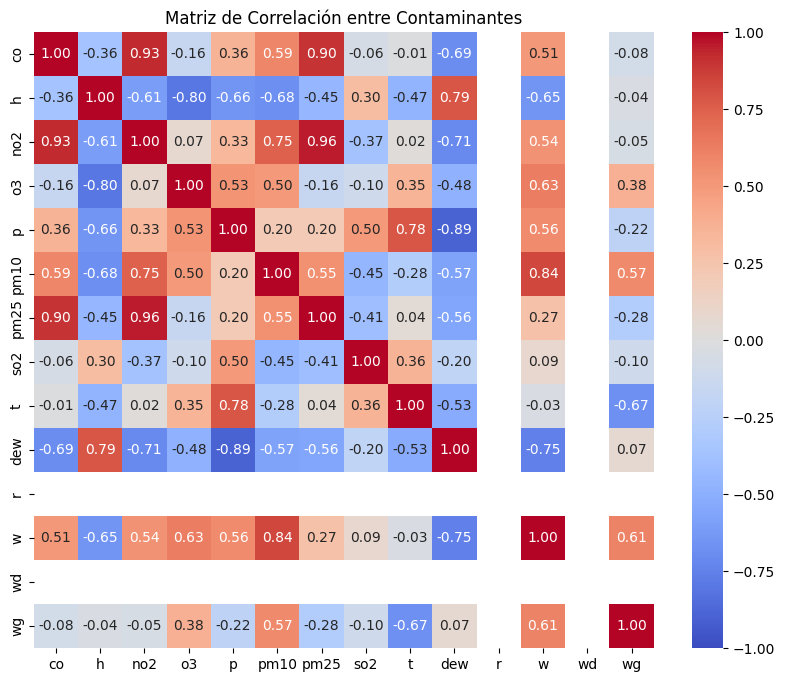

In [ ]:
# Calculamos la matriz de correlación entre contaminantes para identificar relaciones.

# Filtramos solo las columnas numéricas del DataFrame
df_numeric = df.select_dtypes(include=['number'])

# Verificamos el DataFrame filtrado
print(df_numeric.head())

# Calculamos la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df_numeric.corr(), annot=True, fmt='.2f', cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Contaminantes')
plt.show()

C:\Users\jherv\AppData\Local\Temp\ipykernel_4184\4082188104.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['aqi'].fillna(df['aqi'].mean(), inplace=True)


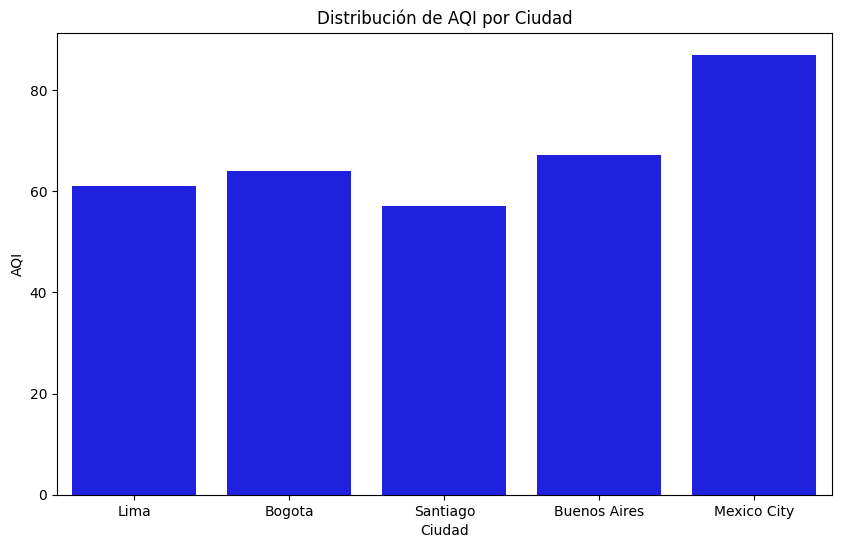

In [14]:
# Visualizamos la distribución del AQI por ciudad.

# Convertimos la columna 'aqi' a numérica y manejamos errores
df['aqi'] = pd.to_numeric(df['aqi'], errors='coerce')

# Rellenamos valores nulos con la media del AQI
df['aqi'].fillna(df['aqi'].mean(), inplace=True)

# Visualizamos la distribución del AQI por ciudad
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='city', y='aqi', color='blue')  # Usamos un color fijo
plt.title('Distribución de AQI por Ciudad')
plt.xlabel('Ciudad')
plt.ylabel('AQI')
plt.show()


C:\Users\jherv\AppData\Local\Temp\ipykernel_4184\2822298368.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['pm25'], label='PM2.5', shade=True, color='blue')
C:\Users\jherv\AppData\Local\Temp\ipykernel_4184\2822298368.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['pm10'], label='PM10', shade=True, color='green')
C:\Users\jherv\AppData\Local\Temp\ipykernel_4184\2822298368.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['co'], label='CO', shade=True, color='red')


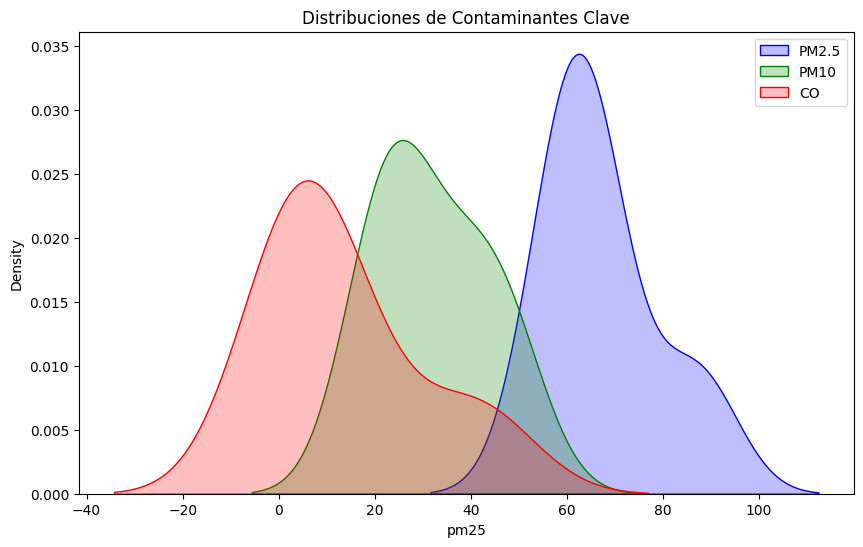

In [15]:
# Analizamos las distribuciones de PM2.5, PM10 y CO.

plt.figure(figsize=(10, 6))
sns.kdeplot(df['pm25'], label='PM2.5', shade=True, color='blue')
sns.kdeplot(df['pm10'], label='PM10', shade=True, color='green')
sns.kdeplot(df['co'], label='CO', shade=True, color='red')
plt.title('Distribuciones de Contaminantes Clave')
plt.legend()
plt.show()


C:\Users\jherv\AppData\Local\Temp\ipykernel_1028\801815104.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.catplot(data=df, x='dominant_pollutant', y='aqi', kind='box', palette='Set2')


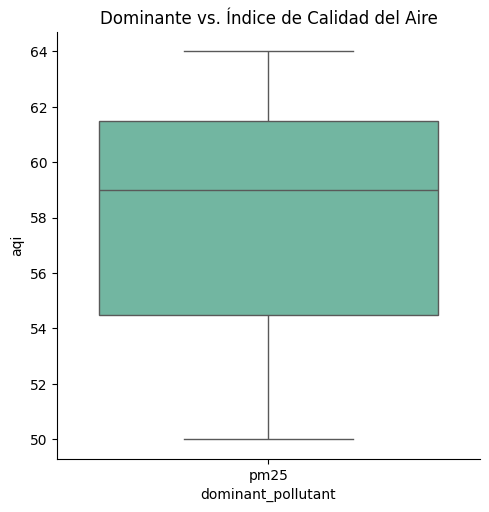

In [ ]:
#Relación entre el contaminante dominante y el índice de calidad del aire (AQI) en las ciudades estudiadas.
sns.catplot(data=df, x='dominant_pollutant', y='aqi', kind='box', palette='Set2')
plt.title('Dominante vs. Índice de Calidad del Aire')
plt.show()

In [16]:
# Creamos un mapa interactivo que visualiza la calidad del aire en las ciudades seleccionadas.

# Agregamos coordenadas para cada ciudad.
coordinates = {
    'Lima': [-12.0464, -77.0428],
    'Bogota': [4.7110, -74.0721],
    'Santiago': [-33.4489, -70.6693],
    'Buenos Aires': [-34.6037, -58.3816],
    'Mexico City': [19.4326, -99.1332]
}

df['latitude'] = df['city'].map(lambda city: coordinates[city][0])
df['longitude'] = df['city'].map(lambda city: coordinates[city][1])

# Creamos el mapa base.
mapa = folium.Map(location=[-15.0, -60.0], zoom_start=4)

# Añadimos marcadores para cada ciudad.
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['aqi'] / 20,  # Escalamos el tamaño del círculo según el AQI.
        color='red' if row['aqi'] > 100 else 'green',
        fill=True,
        popup=f"{row['city']}: AQI {row['aqi']}"
    ).add_to(mapa)

# Mostramos el mapa.
mapa


# Insights

Contaminantes clave:
-PM2.5 tiene la mayor influencia en el AQI, seguido por PM10.
-Lima y Ciudad de México tienen los niveles más altos de contaminación.

Correlaciones significativas:
-PM2.5 y AQI tienen una fuerte correlación positiva.
-La relación entre contaminantes secundarios como CO y SO2 es más débil.

Recomendaciones:
-Implementar purificadores de aire en Lima y Ciudad de México.
-Monitorear más de cerca PM2.5 y PM10 en áreas urbanas densas.


Diccionario de Términos
1. AQI (Air Quality Index)
Es el índice que mide la calidad del aire, basado en la concentración de contaminantes como PM2.5, PM10, CO, SO2, NO2 y O3.

2. PM2.5 (Partículas finas)
Partículas suspendidas en el aire con un diámetro menor a 2.5 micrómetros. Son lo suficientemente pequeñas para ingresar a los pulmones y al torrente sanguíneo.

3. PM10 (Partículas gruesas)
Partículas suspendidas en el aire con un diámetro de hasta 10 micrómetros. Son menos peligrosas que las PM2.5, pero también dañinas para la salud.

4. CO (Monóxido de Carbono)

5. SO2 (Dióxido de Azufre)

6. O3 (Ozono troposférico)